In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Walmart_Store_sales.csv to Walmart_Store_sales.csv


# Read and Clean the Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Walmart_Store_sales.csv')

# Convert date column
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Group sales by week
df_weekly = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Rename for Prophet format
df_weekly.columns = ['ds', 'y']
df_weekly.head()

,ds,y
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


# Install & Run Prophet Model

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzjmg_vlz/43c17kc0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzjmg_vlz/k8qpwepy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66555', 'data', 'file=/tmp/tmpzjmg_vlz/43c17kc0.json', 'init=/tmp/tmpzjmg_vlz/k8qpwepy.json', 'output', 'file=/tmp/tmpzjmg_vlz/prophet_model_byw4h5n/prophet_model-20250721163402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:34:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:34:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Text(0.5, 1.0, 'Walmart Weekly Sales Forecast')

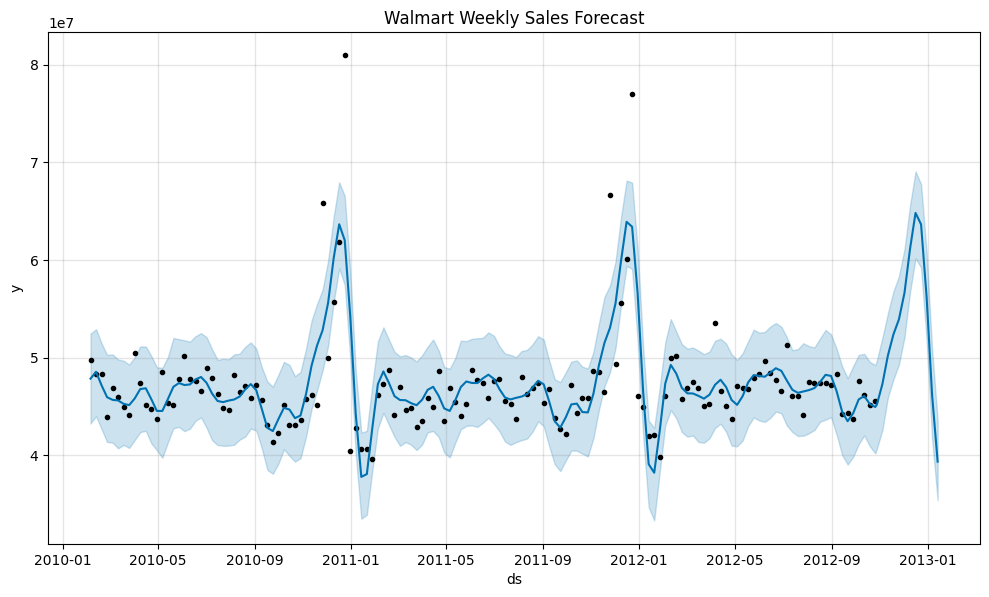

In [ ]:
!pip install prophet

from prophet import Prophet

# Build model
model = Prophet()
model.fit(df_weekly)

# Future predictions: 12 weeks
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title("Walmart Weekly Sales Forecast")


# Export Forecast to Power BI

In [ ]:
forecast_output = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_output.columns = ['Date', 'Forecast_Sales', 'Lower_Bound', 'Upper_Bound']
forecast_output.to_csv('forecast_output.csv', index=False)


In [ ]:
files.download('forecast_output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>